In [48]:
import pandas as pd

trip_data_file = "data/train.csv"

full_tripdata = pd.read_csv(trip_data_file, nrows=50000)

In [49]:
full_tripdata.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [50]:
# joing the pick up and drop off coordinate together
pickupLoc = full_tripdata[['pickup_longitude','pickup_latitude']]
pickupLoc = pickupLoc.rename(columns={'pickup_longitude':'longtitude', 'pickup_latitude':'latitude'})
dropoffLoc = full_tripdata[['dropoff_longitude','dropoff_latitude']]
dropoffLoc = pickupLoc.rename(columns={'dropoff_longitude':'longtitude', 'dropoff_latitude':'latitude'})

loc = pd.concat([pickupLoc,dropoffLoc],axis=0)

In [51]:
loc.count()

longtitude    100000
latitude      100000
dtype: int64

In [52]:
#try to use K-mean to cluster the locations together 

locations = loc.copy()

locations = locations.drop_duplicates()

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

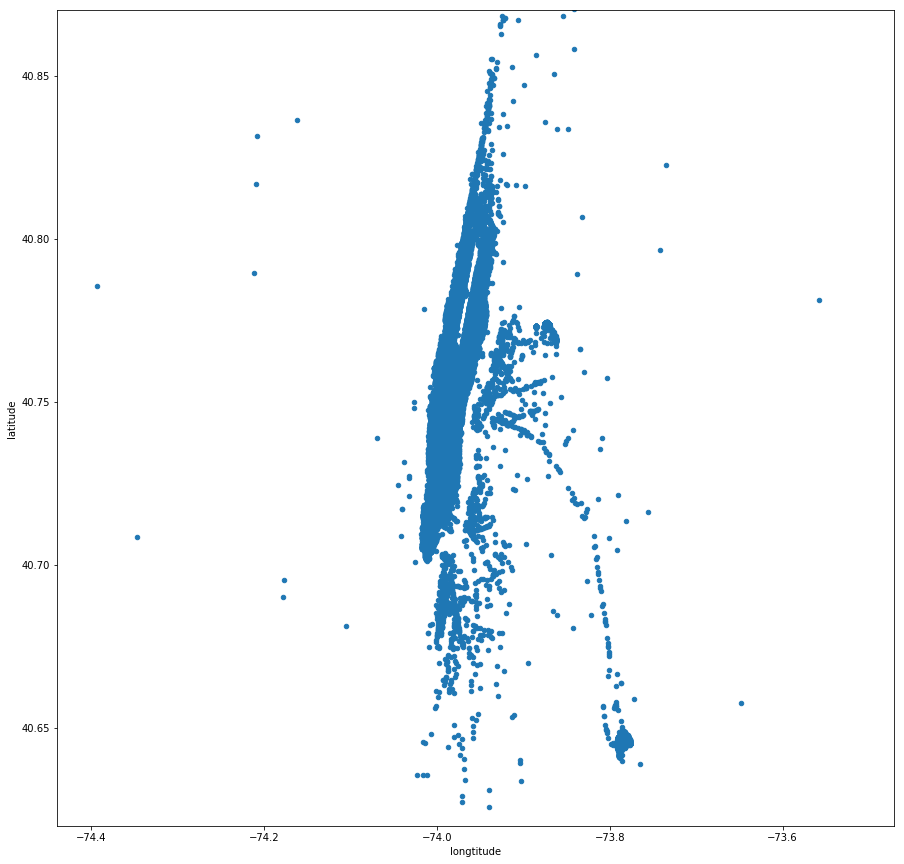

In [54]:
#locations.describe()
#locations.sort_values(by=['latitude'])
#plot the chart with raw coordinates
locations.plot.scatter(x="longtitude",y="latitude",figsize=(15,15),ylim=(40.62,40.87))

In [55]:
#Training with K-mean
from sklearn.cluster import KMeans

training = locations.as_matrix()

kmeans = KMeans(n_clusters=50).fit(training)

/Users/mali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


49867


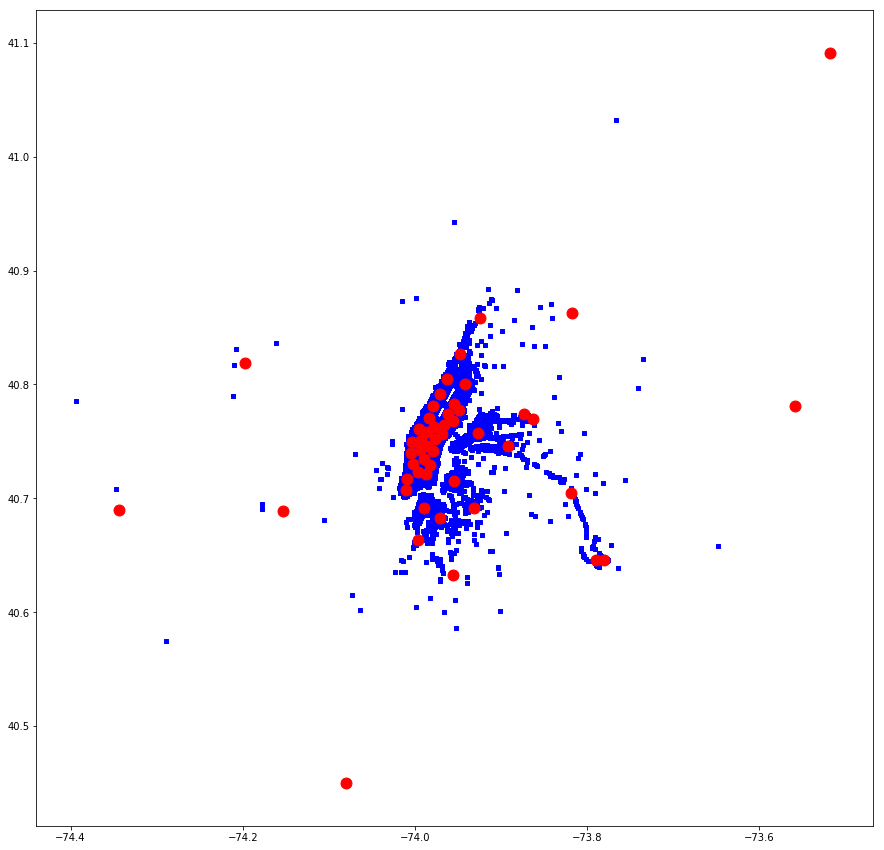

In [57]:
# Visulase the Trip locations and cluster center together, to validate the trainin result

cluster_centers = kmeans.cluster_centers_
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)
print(len(training[:,0]))
ax1.scatter(training[:,0], training[:,1], s=10, c='b', marker="s", label='loc')
ax1.scatter(cluster_centers[:,0],cluster_centers[:,1], s=120, c='r', marker="o", label='center')
#plt.legend(loc='upper left');
plt.show()

In [58]:
#Save the trained model to disk
import pickle
pickle.dump(kmeans,open("location_cluster_kmean","wb"))

In [ ]:
#using DBSCAN clustering is the idea I found online when I discovered K-mean isn't the best apporach for geo-spatial clustering 
#algorithm 
# Reference URL http://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/


from sklearn.cluster import DBSCAN
import numpy as np

#kms_per_radian = 6371.0088
#epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(training))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([training[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))